In [1]:
import os
os.getcwd()

'C:\\Users\\Shlagha Rastogi'

In [2]:
os.chdir('C:/Users/Shlagha Rastogi/Downloads/Semester 2/Machine Learning/Assignments')

In [3]:
import pandas as pd
data = pd.read_csv("Admission_Predict.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Cleaning

In [5]:
#Checking for null values
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Dropping Serial number column 
data = data.drop(['Serial No.'],1)

In [7]:
# Checking how dataset looks now 
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
# Datatypes of the columns
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [100]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# 1. Linear Regression

In [75]:
X = data.drop(['Chance of Admit '],1)
y = data['Chance of Admit ']

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, random_state = 42, test_size = 0.2)

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [77]:
lr_model = lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_model.score(X_test, y_test)

0.8212082591486991

In [97]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv = 5).mean()

0.8108015220863883

# Heatmap

In [25]:
import seaborn as sns

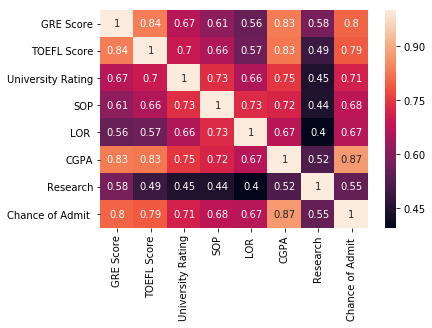

In [26]:
sns.heatmap(data.corr(), annot=True) # CGPA matters the most

# 2. RFE

In [27]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr)

In [72]:
rfe_model = rfe.fit(X_train,y_train)
rfe_pred = rfe.predict(X_test)
rfe.score(X_test, y_test)

0.8243522571933357

In [73]:
# rfe.ranking_
# 4:'GRE Score', 3:'TOEFL Score', 2:'University Rating', 5:'SOP', 1:'LOR ', 1:'CGPA',1:'Research', 'Chance of Admit '

array([4, 2, 3, 5, 1, 1, 1])

In [32]:
# Xnew = data.drop(['GRE Score','TOEFL Score','University Rating','SOP'], 1)
# y = data['Chance of Admit ']
# X_train, X_test, y_train, y_test = tts(Xnew, y, random_state = 42, test_size = 0.2)

In [33]:
# lr_model1 = lr.fit(X_train, y_train)
# lr_pred1 = lr.predict(X_test)
# model_fit.score(X_test,lr_pred1)

In [80]:
cross_val_score(rfe,X,y,cv = 5).mean()

0.7648426830548265

# 3. Decision Treee

In [81]:
from sklearn.tree import DecisionTreeRegressor  
dtr = DecisionTreeRegressor(random_state=42)

In [82]:
model_fit = dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)

In [83]:
model_fit.score(X_test, y_test)

0.6267429864554561

In [62]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0648
Mean Squared Error: 0.00863
Root Mean Squared Error: 0.09289779329994874


In [84]:
cross_val_score(dtr, X, y, cv = 5).mean()

0.5221363400719435

# 4. Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

In [86]:
rfr_model = rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr.score(X_test,y_test)

C:\Users\Shlagha Rastogi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7972102535555563

In [87]:
cross_val_score(rfr, X, y, cv = 5).mean()

0.7202973100523618

Part II

In [88]:
import pandas as pd
data1 = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [89]:
data1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [90]:
data1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [91]:
data1 = data1.drop(['Serial No.'],1)

In [92]:
data1.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [99]:
data1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# 1. Linear Regression

In [94]:
X = data1.drop(['Chance of Admit '],1)
y = data1['Chance of Admit ']

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr_model = lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_model.score(X_test, y_test)

0.8188432567829629

In [96]:
cross_val_score(lr, X, y, cv = 5).mean()

0.8108015220863883

# 2. Decision Tree

In [101]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)

dtr_model = dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_model.score(X_test, y_test)

0.57799511002445

In [102]:
cross_val_score(dtr, X, y, cv = 5).mean()

0.564987222585232

# 3. Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

rfr_model = rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr_model.score(X_test, y_test)

C:\Users\Shlagha Rastogi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7767784841075795

In [104]:
cross_val_score(rfr, X, y, cv = 5).mean()

0.7578342951236742

# 4. RFE

In [105]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr)

rfe_model = rfe.fit(X_train, y_train)
rfe_pred = rfe.predict(X_test)
rfe_model.score(X_test, y_test)

0.8243522571933357

In [106]:
cross_val_score(rfe, X, y, cv = 5).mean()

0.7954354852799855